In [20]:
import torch
from PIL import Image
from torchvision import transforms, utils
from torch.nn import functional as F
from dssnet import build_model
from tools.visual import plot_image, make_simple_grid
%matplotlib inline

In [21]:
img_path = 'D:/3D-soda-cans-model_Z.jpg'
pre_trained = 'D:/nonat project/Experiment 1.2/weights/Experiment1.2.pth'
select = [1, 2, 3, 6]
use_cuda = True
device = torch.device('cpu') if use_cuda else torch.device('cpu')

In [22]:
img = Image.open(img_path)

img_shape = (img.size[1], img.size[0])
print('image size (HxW): ', img_shape)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image = transform(img).unsqueeze(0).to(device)

image size (HxW):  (1080, 1920)


#### 3. Load Network

In [23]:
net = build_model().to(device)
net.load_state_dict(torch.load(pre_trained))

with torch.no_grad():
    prob_pred = net(image)
    prob_final = torch.mean(torch.cat([prob_pred[i] for i in select], dim=1), dim=1, keepdim=True)

# upsampling to original size
prob_pred = [F.interpolate(prob, img_shape, mode='bilinear', align_corners=True).cpu().data.squeeze(0) for prob in prob_pred]
prob_final = F.interpolate(prob_final, img_shape, mode='bilinear', align_corners=True).cpu().data.squeeze(0)

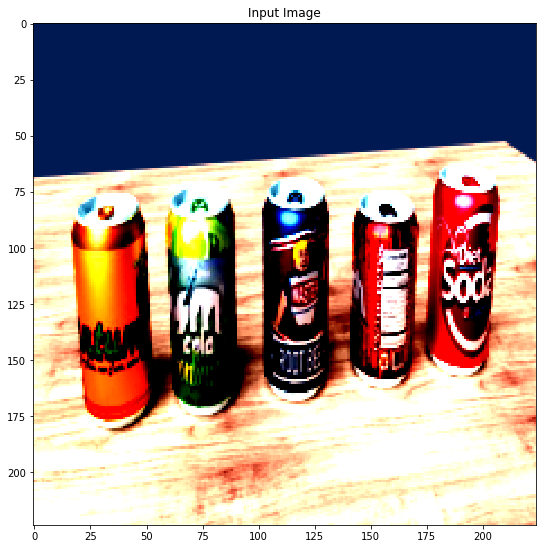

In [26]:
#Input
plot_image(image[0], (1080/120, 1920/120), 'Input Image',True)

#### 4. show results

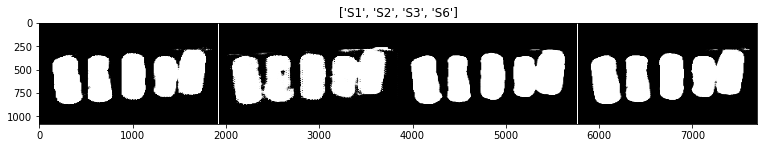

In [27]:
# output of sides and fusion
ratio = 160/(img_shape[1]*7)
title = ['S1','S2','S3','S6']
plot_image(make_simple_grid([prob_pred[1],prob_pred[2],prob_pred[3],prob_pred[6]]), (img_shape[0]*ratio, 160), title=title)

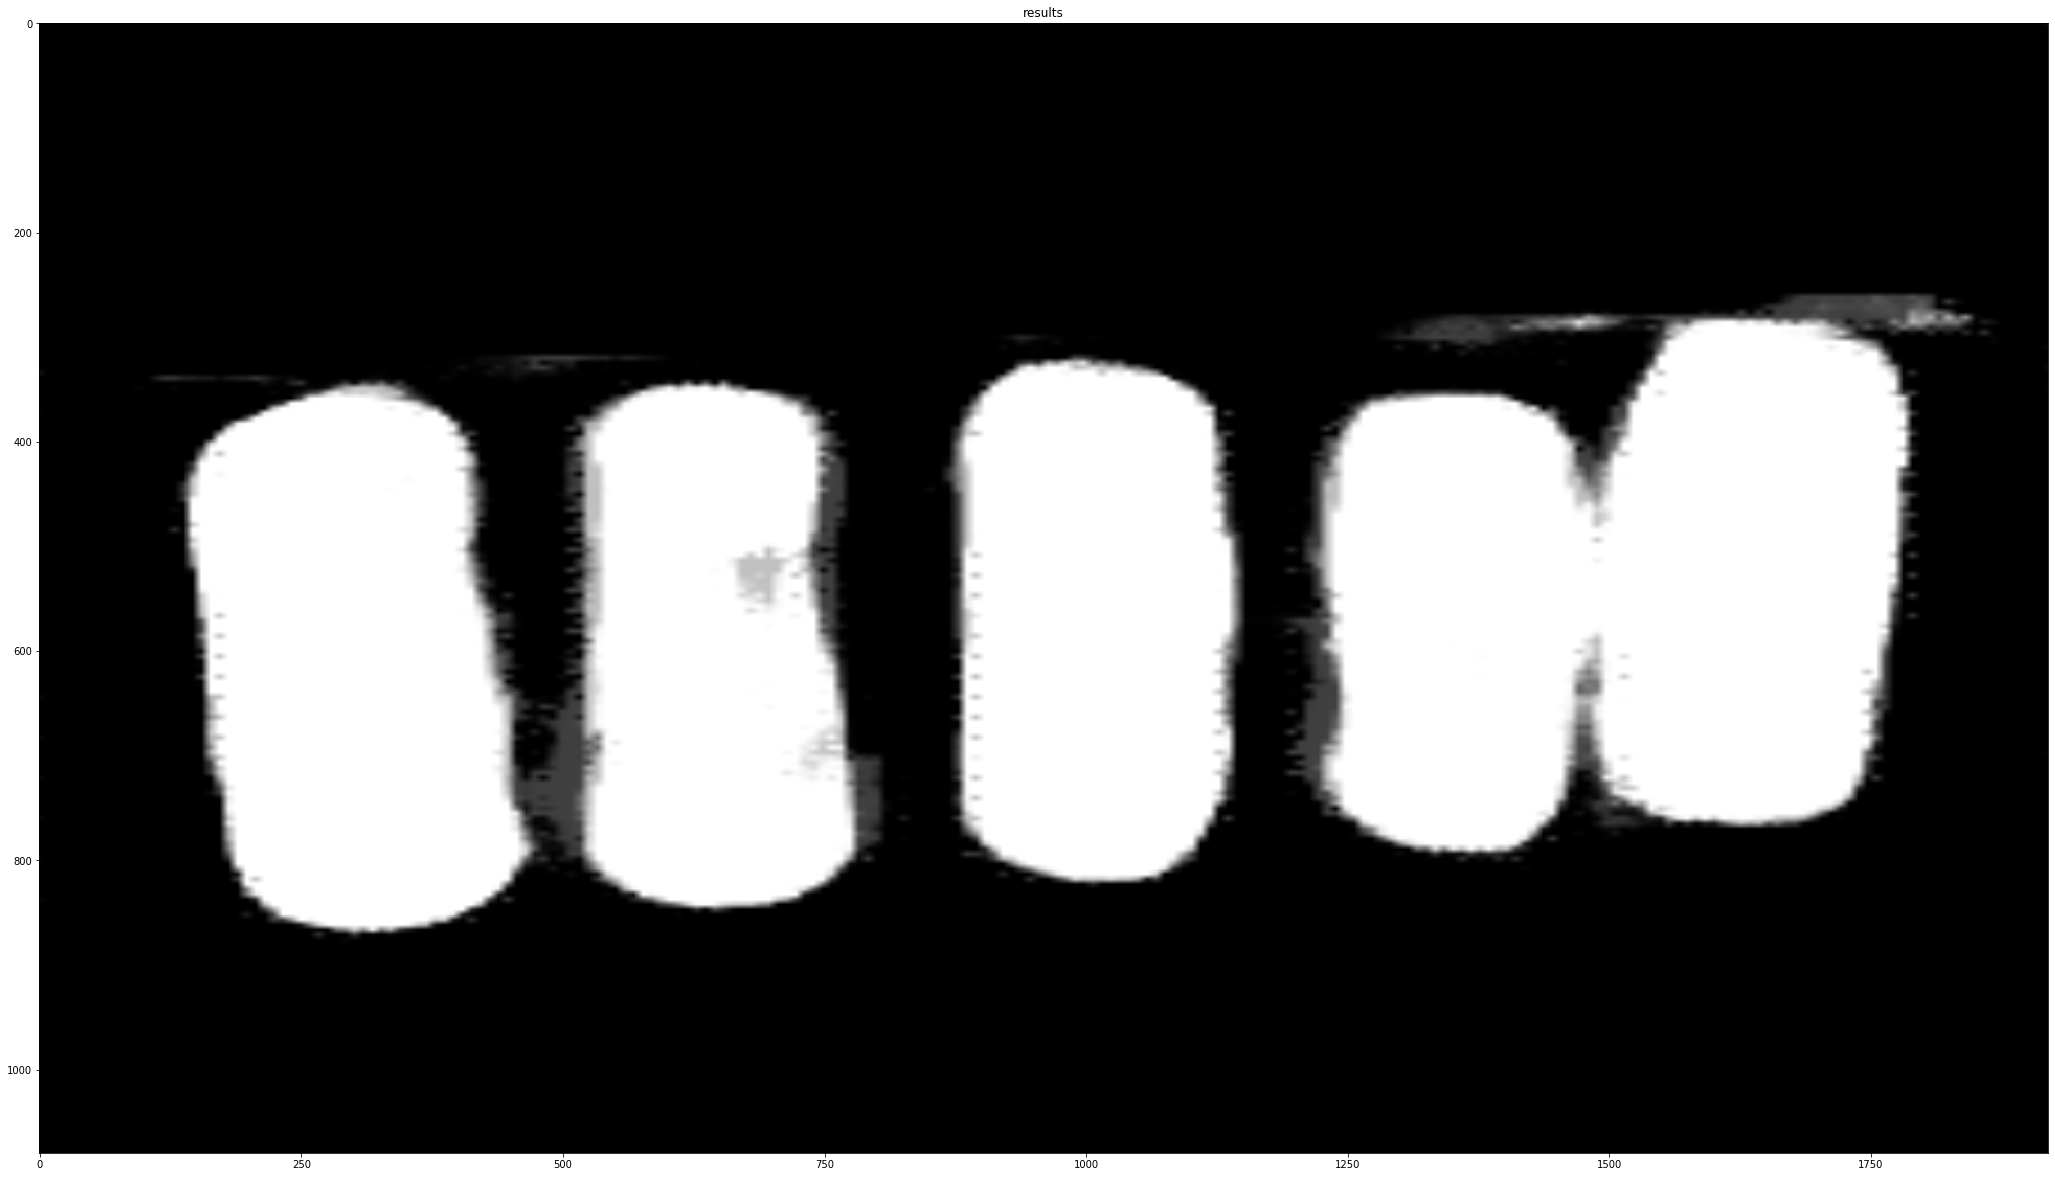

In [28]:
# results
plot_image(prob_final, (img_shape[0]/30, img_shape[1]/30), 'results')

In [29]:
img_path = 'D:/ferrari.jpg'
img = Image.open(img_path)

img_shape = (img.size[1], img.size[0])
print('image size (HxW): ', img_shape)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image = transform(img).unsqueeze(0).to(device)

image size (HxW):  (768, 1024)


In [34]:
with torch.no_grad():
    prob_pred = net(image)
    prob_final = torch.mean(torch.cat([prob_pred[i] for i in select], dim=1), dim=1, keepdim=True)

# upsampling to original size
prob_pred = [F.interpolate(prob, img_shape, mode='bilinear', align_corners=True).cpu().data.squeeze(0) for prob in prob_pred]
prob_final = F.interpolate(prob_final, img_shape, mode='bilinear', align_corners=True).cpu().data.squeeze(0)

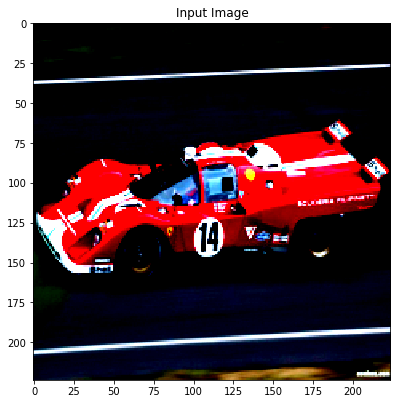

In [40]:
# results
plot_image(image[0], (img_shape[0]/120, img_shape[1]/120), 'Input Image',True)

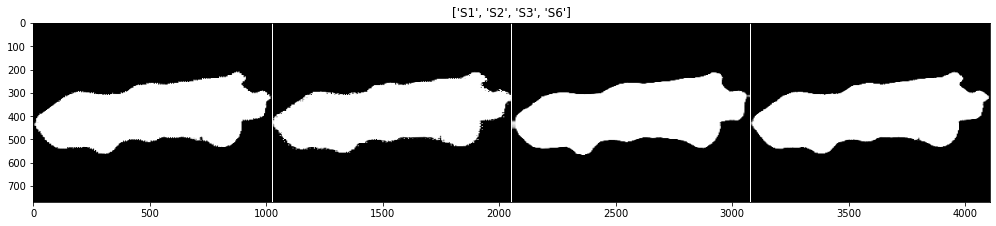

In [35]:
# output of sides and fusion
ratio = 160/(img_shape[1]*7)
title = ['S1','S2','S3','S6']
plot_image(make_simple_grid([prob_pred[1],prob_pred[2],prob_pred[3],prob_pred[6]]), (img_shape[0]*ratio, 160), title=title)

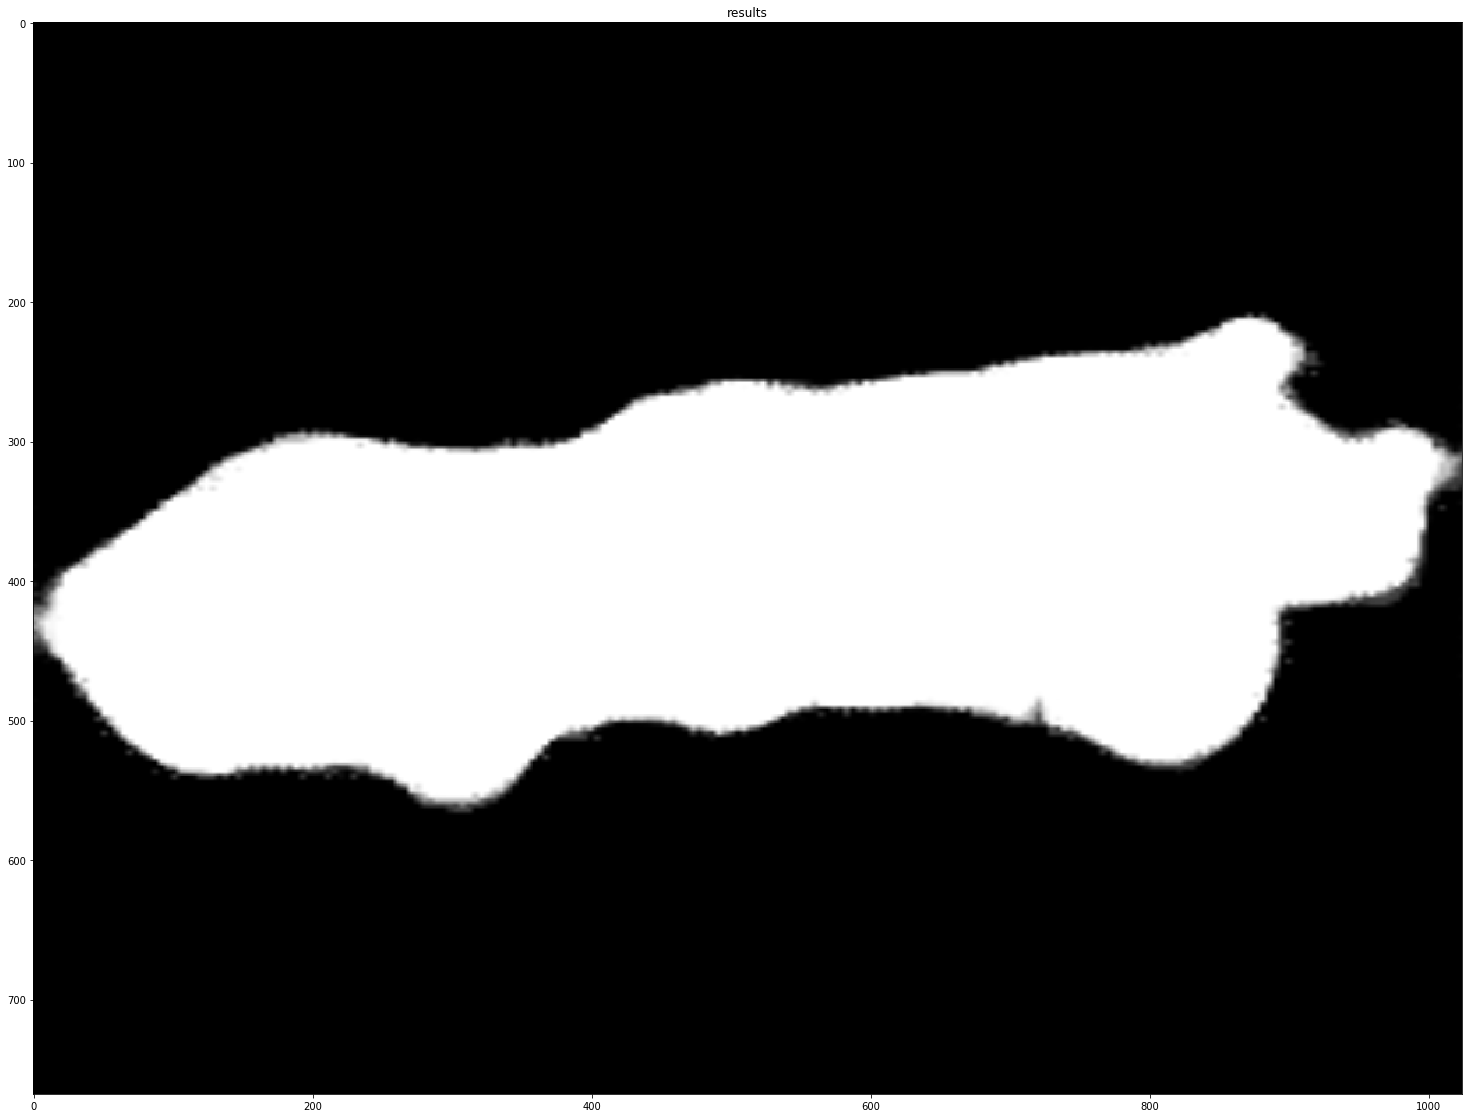

In [36]:
# results
plot_image(prob_final, (img_shape[0]/30, img_shape[1]/30), 'results')

In [41]:
img_path = 'D:/dogs.jpg'
img = Image.open(img_path)

img_shape = (img.size[1], img.size[0])
print('image size (HxW): ', img_shape)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image = transform(img).unsqueeze(0).to(device)

image size (HxW):  (330, 510)


In [42]:
with torch.no_grad():
    prob_pred = net(image)
    prob_final = torch.mean(torch.cat([prob_pred[i] for i in select], dim=1), dim=1, keepdim=True)

# upsampling to original size
prob_pred = [F.interpolate(prob, img_shape, mode='bilinear', align_corners=True).cpu().data.squeeze(0) for prob in prob_pred]
prob_final = F.interpolate(prob_final, img_shape, mode='bilinear', align_corners=True).cpu().data.squeeze(0)

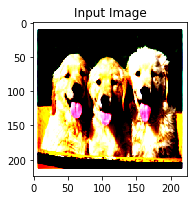

In [43]:
# results
plot_image(image[0], (img_shape[0]/120, img_shape[1]/120), 'Input Image',True)

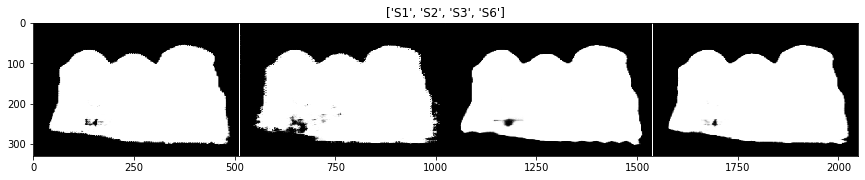

In [44]:
# output of sides and fusion
ratio = 160/(img_shape[1]*7)
title = ['S1','S2','S3','S6']
plot_image(make_simple_grid([prob_pred[1],prob_pred[2],prob_pred[3],prob_pred[6]]), (img_shape[0]*ratio, 160), title=title)

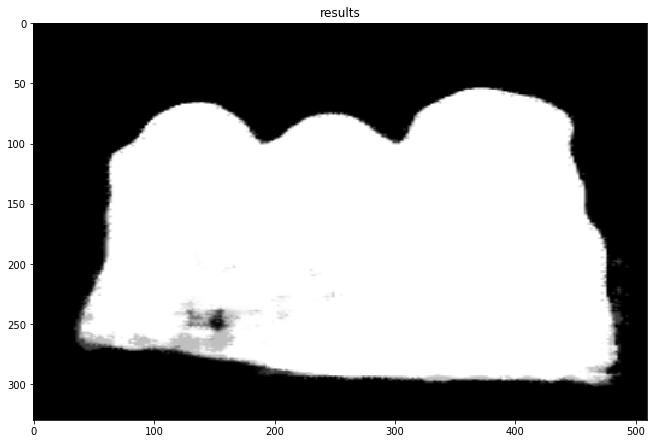

In [45]:
# results
plot_image(prob_final, (img_shape[0]/30, img_shape[1]/30), 'results')